In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 

In [3]:
haberman = pd.read_csv("C:/Users/deeks/Downloads/haberman.csv")

In [4]:
print(haberman.shape)

(306, 4)


In [5]:

print(haberman.columns)
haberman.info()

Index(['age', 'year', 'nodes', 'Survival status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
year               306 non-null int64
nodes              306 non-null int64
Survival status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


##### Converting '1' and '3' to 'greater than 5 years of survival' and 'lesser than 5 years of survival', respectively


In [6]:
haberman['Survival status']=haberman["Survival status"].map({1:'greater than 5 y', 2:'lesser than 5 y'})
haberman.head(10)


,age,year,nodes,Survival status
0,30,64,1,greater than 5 y
1,30,62,3,greater than 5 y
2,30,65,0,greater than 5 y
3,31,59,2,greater than 5 y
4,31,65,4,greater than 5 y
5,33,58,10,greater than 5 y
6,33,60,0,greater than 5 y
7,34,59,0,lesser than 5 y
8,34,66,9,lesser than 5 y
9,34,58,30,greater than 5 y


In [8]:
print(haberman["Survival status"].value_counts())


greater than 5 y    225
lesser than 5 y      81
Name: Survival status, dtype: int64


#### Observation:
##### Number of people that survived for more than 5 years = 225     
##### Number of people that survived for lesser than 5 years = 81

In [9]:
#converting status back to numeric value
haberman['Survival status']=haberman["Survival status"].map({'greater than 5 y':1, 'lesser than 5 y':2}) 


In [10]:
haberman.describe()


,age,year,nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### My Inference:
#### the mean age when there are possibilies of getting the cancer = 52
#### range in age for tha same = 42 - 62
#### min age in the dataset - 30; max age = 83
#### 25% of the people were below the age of 44 and they all survived for more than 5 years after surgery
#### 50% of them were under age 52 and survived
#### 75% of them were below age 60


#### Information on people who survived

In [11]:
surv=haberman[haberman['Survival status']==1]
surv.describe()

,age,year,nodes,Survival status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


#### Information on people who did not survived

In [12]:
not_surv=haberman[haberman['Survival status']==2]
not_surv.describe()


,age,year,nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


##### We can see that the mean node of the data of people who did not survive is greater than the one with people who survived. So, we can assume for now, that survival rate is related to node.

#### We can say that, lesser the value of node, more the chances of survival

#### Univariate analysis

#### Taking node as the factor, we can be affirmative that value of nodes is inversely proportional to rate of survival

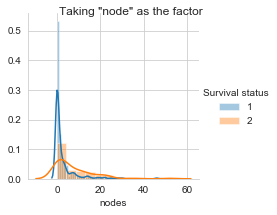

In [30]:
o=sns.FacetGrid(haberman,hue='Survival status',height = 3)\
 .map(sns.distplot,'nodes')\
 . add_legend()
o.fig.suptitle('Taking "node" as the factor')
plt.show()


#### Taking age as the only factor, it is hard to interpret the survival status 

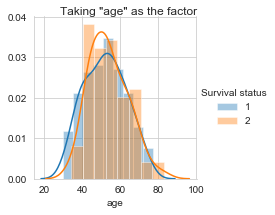

In [31]:
m=sns.FacetGrid(haberman,hue='Survival status',height = 3)\
 .map(sns.distplot,'age')\
 . add_legend();
m.fig.suptitle('Taking "age" as the factor')
plt.show()

#### Taking year as the only factor, it is hard to interpret the survival status

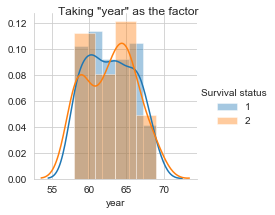

In [32]:
n=sns.FacetGrid(haberman,hue='Survival status',height = 3)\
 .map(sns.distplot,'year')\
 . add_legend();
n.fig.suptitle('Taking "year" as the factor')
plt.show()

#### Multivariate Analysis

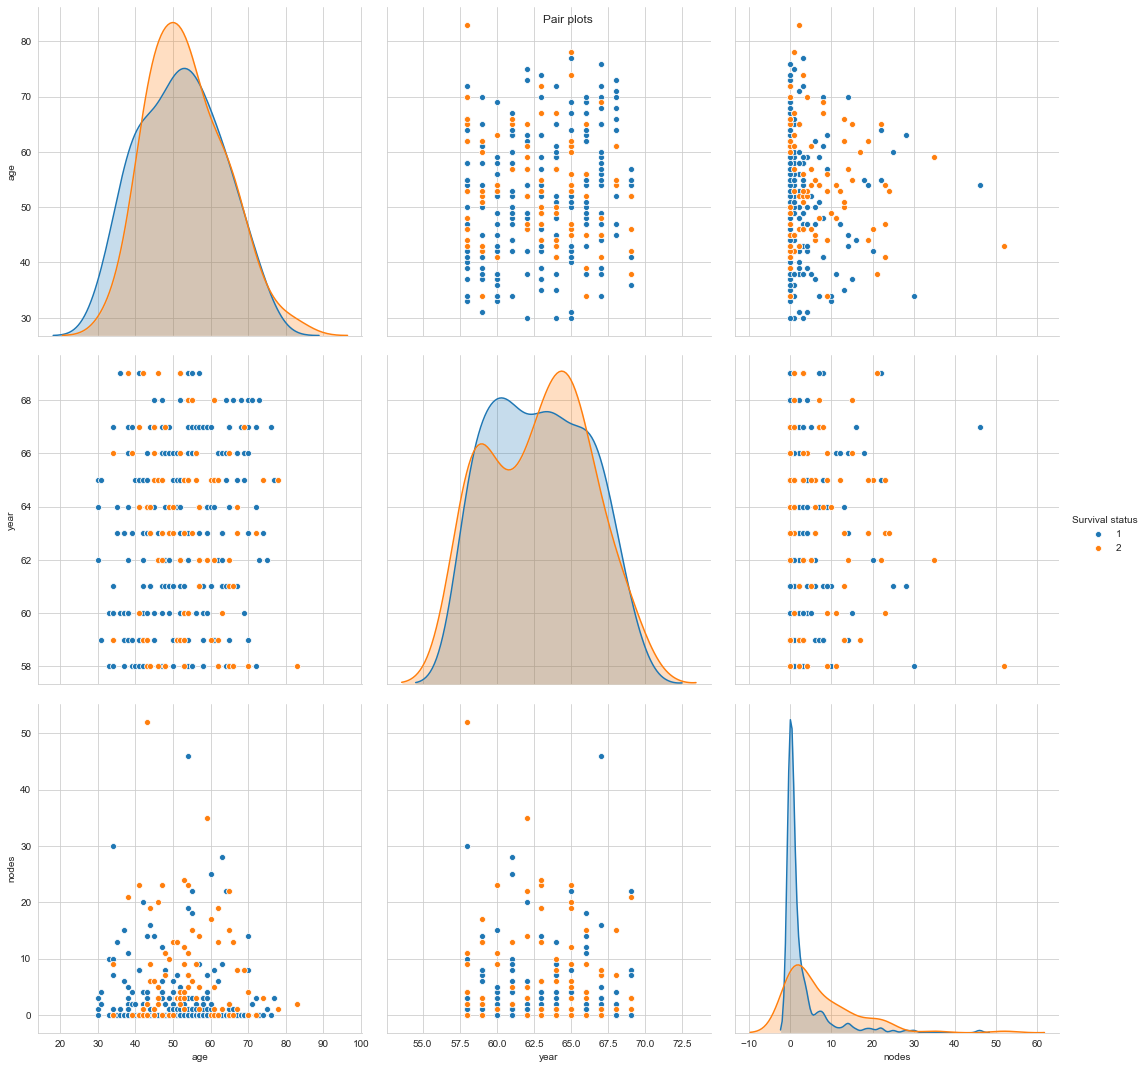

In [34]:
sns.set_style('whitegrid')
p=sns.pairplot(haberman, hue='Survival status', height = 5, vars=['age','year','nodes'])
p.fig.suptitle('Pair plots')
plt.show()

#### From the above pair plots, we can see that taking 'year' vs 'nodes' as the factors, we can see a good separation

#### PDF and CDF

#### PDF and CDF of nodes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


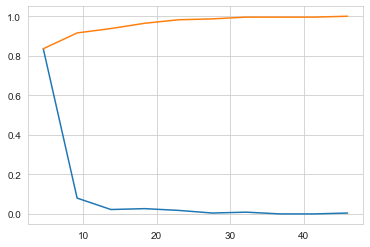

In [52]:
counts, bin_edges = np.histogram(surv['nodes'], bins=10,
                                 density = True) 
pdf = counts/(sum(counts)) 
print(pdf); print(bin_edges) 
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



#### Conclusion:
#### We have seen from before that nodes play an important role. from the above PDF plot, we can see that lesser the value of nodes, greater is the survival.
#### From CDF, we see that there is about 85% chances of survival if nodes are less than 5. If node value is above 40, there is almost no chances of survival.

#### Box plot

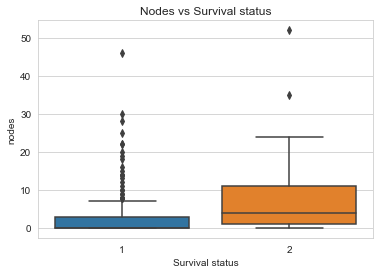

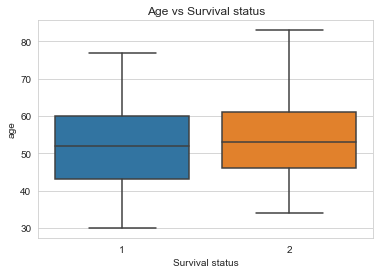

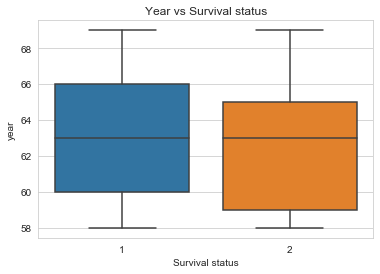

In [50]:
sns.boxplot(x='Survival status',y='nodes', data=haberman).set_title("Nodes vs Survival status")
plt.show()
sns.boxplot(x='Survival status',y='age', data=haberman).set_title("Age vs Survival status")
plt.show()
sns.boxplot(x='Survival status',y='year', data=haberman).set_title("Year vs Survival status") 
plt.show()

#### Violin plot

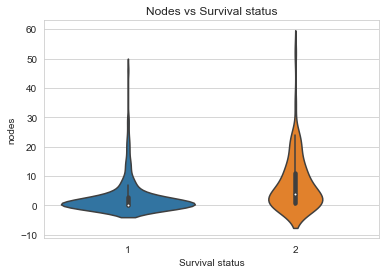

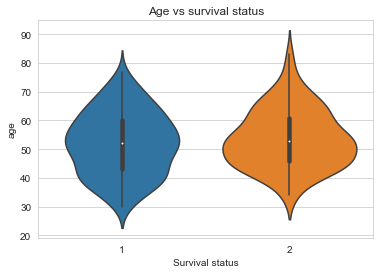

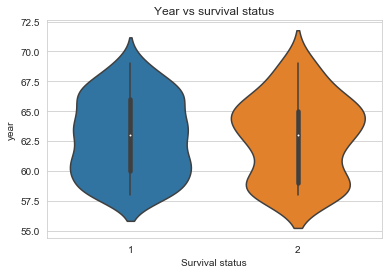

In [47]:
sns.violinplot(x="Survival status", y="nodes", data=haberman, height=5).set_title("Nodes vs Survival status")
plt.show()
sns.violinplot(x="Survival status", y="age", data=haberman, height=5).set_title("Age vs survival status")
plt.show()
sns.violinplot(x="Survival status", y="year", data=haberman, height=5).set_title("Year vs survival status")
plt.show()

#### Conclusion from box and violin plots:
#### As the node value increases, the chances of survival reduces.
#### Almost 80% of the patients have less than or equal to 5 nodes
#### The chances of survival is less before the year 1960

#### Contour plot


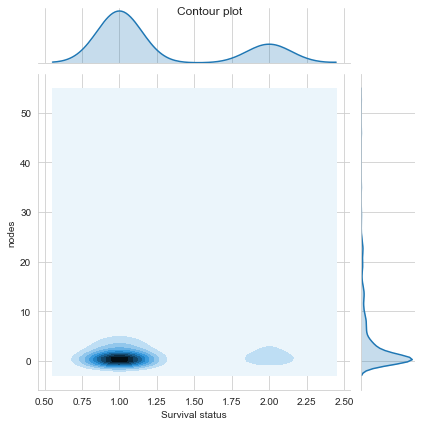

In [49]:
sns.jointplot(x="Survival status", y="nodes", data=haberman, kind="kde").fig.suptitle("Contour plot"); 
plt.show();

#### Conclusion:

#### There is no clear cut explation as to what the survival rate depends on, but nodes can be taken as a good option.
#### The lesser the node value, more are the chances of survival
#### The rate of survial between the year 1962-1965 are lesser comparitively
